In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ball_points_generator(dim, N, radius):
    # Generowanie macierzy zmiennych losowych o rozkładzie normalnym standardowym
    xi = np.random.normal(size=(dim, N))

    # obliczanie normy
    norm = np.linalg.norm(xi, axis=0)

    S = xi / norm
    U = np.random.uniform(low=0.0, high=1.0, size=N)
    S = S * np.power(U, 1/dim)
    points = S * radius

    # Transponowanie macierzy punktów
    # points = scaled_xi.T

    return points.T

In [3]:
def sphere_points_generator(dim, N, radius):
    # Generowanie macierzy zmiennych losowych o rozkładzie normalnym standardowym
    xi = np.random.normal(size=(dim, N))

    # Obliczanie sumy kwadratów zmiennych losowych dla każdego punktu
    sum_of_squares = np.sum(xi**2, axis=0)

    # Obliczanie wartości λ na podstawie żądanej wartości
    lambda_squared = radius**2

    # Skalowanie zmiennych losowych dla każdego punktu, aby uzyskać żądaną wartość λ
    scaled_xi = xi * np.sqrt(lambda_squared / sum_of_squares)

    # Transponowanie macierzy punktów
    # unit_vectors = scaled_xi.T

    # return unit_vecto
    return scaled_xi.T

In [4]:
def generate_n_dimensional_torus(n_dimensions, n_points, R=2, r=1):
    """
    Creates an n-dimensional torus.

    Parameters:
    n_dimensions : int
        The number of dimensions for the torus. Must be greater than or equal to 2.
    n_points : int
        The number of points.
    R : float
        The distance from the center of the tube to the center of the torus.
    r : float
        The radius of the tube (distance from the center of the tube to the torus surface).

    Returns:
    numpy.ndarray
        The n-dimensional points of the torus.
    """

    assert n_dimensions >= 2, "Number of dimensions must be greater than or equal to 2."

    # generate n_points random angles for each dimension
    angles = np.random.uniform(0, 2*np.pi, (n_points, n_dimensions))

    # calculate the n-dimensional points on the torus
    coordinates = []
    for i in range(n_dimensions):
        if i == 0:
            coordinate = (R + r * np.cos(angles[:, 1])) * np.cos(angles[:, 0])
        elif i == 1:
            coordinate = (R + r * np.cos(angles[:, 1])) * np.sin(angles[:, 0])
        else:
            coordinate = r * np.sin(angles[:, i])
        coordinates.append(coordinate)

    return np.array(coordinates).T

In [5]:
from sklearn.manifold import TSNE
from umap import UMAP
from trimap import TRIMAP
from pacmap import PaCMAP

def TSNE_reduce(data):
    tsne = TSNE()
    return tsne.fit_transform(data)

def Umap_reduce(data):
    umap = UMAP()
    return umap.fit_transform(data)

def Trimap_reduce(data):
    trimap = TRIMAP()
    return trimap.fit_transform(data)

def Pacmap_reduce(data):
    pacmap = PaCMAP()
    return pacmap.fit_transform(data)

def IVHD_reduce(data):
    ...

def embeded_visualization(data, title):
    # rozbicie punktów na współrzędne x, y, z
    x = data[:, 0]
    y = data[:, 1]

    # wygenerowanie wykresu punktów
    plt.scatter(x, y, c='green')

    plt.title(f"{title} Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

def embeded_visualization_two_clases(data, N, title):
    # rozbicie punktów na współrzędne x, y, z
    x = data[:N, 0]
    y = data[:N, 1]

    x1 = data[N:2*N, 0]
    y1 = data[N:2*N, 1]

    # wygenerowanie wykresu punktów
    plt.scatter(x, y, c='green')
    plt.scatter(x1, y1, c='blue')

    plt.title(f"{title} Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

def embeded_visualization_three_clases(data, N, title):
    # rozbicie punktów na współrzędne x, y, z
    x = data[:N, 0]
    y = data[:N, 1]

    x1 = data[N:2*N, 0]
    y1 = data[N:2*N, 1]

    x2 = data[2*N:, 0]
    y2 = data[2*N:, 1]

    # wygenerowanie wykresu punktów
    plt.scatter(x, y, c='green')
    plt.scatter(x1, y1, c='blue')
    plt.scatter(x2, y2, c='red')

    plt.title(f"{title} Visualization")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

M:\Anaconda\envs\tf\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
M:\Anaconda\envs\tf\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
M:\Anaconda\envs\tf\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument was

In [13]:
from local_score import LocalMetric

In [16]:
# sphere and torus inside
sphere_points = sphere_points_generator(3, 100, 10)
torus_points = generate_n_dimensional_torus(3, 100, 4)
data = np.concatenate((sphere_points, torus_points))

t-SNE

In [17]:
local_metrics = LocalMetric()
perplexity_list = [2, 5, 10, 20, 30, 40, 50, 80, 100] # 30 -> standard in TSNE

# to local metric
x = data
array_zer = np.zeros(100)
array_jed = np.ones(100)
y = np.concatenate((array_zer, array_jed))

reduced_his = []  # Lista do przechowywania wykresów

for p in perplexity_list:
    tsne = TSNE(n_components=2, perplexity=p)
    reduced_tsne = tsne.fit_transform(data)
    reduced_his.append(reduced_tsne)

Calculating d_hd
tsne (per = 2)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
Calculating d_hd
tsne (per = 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.

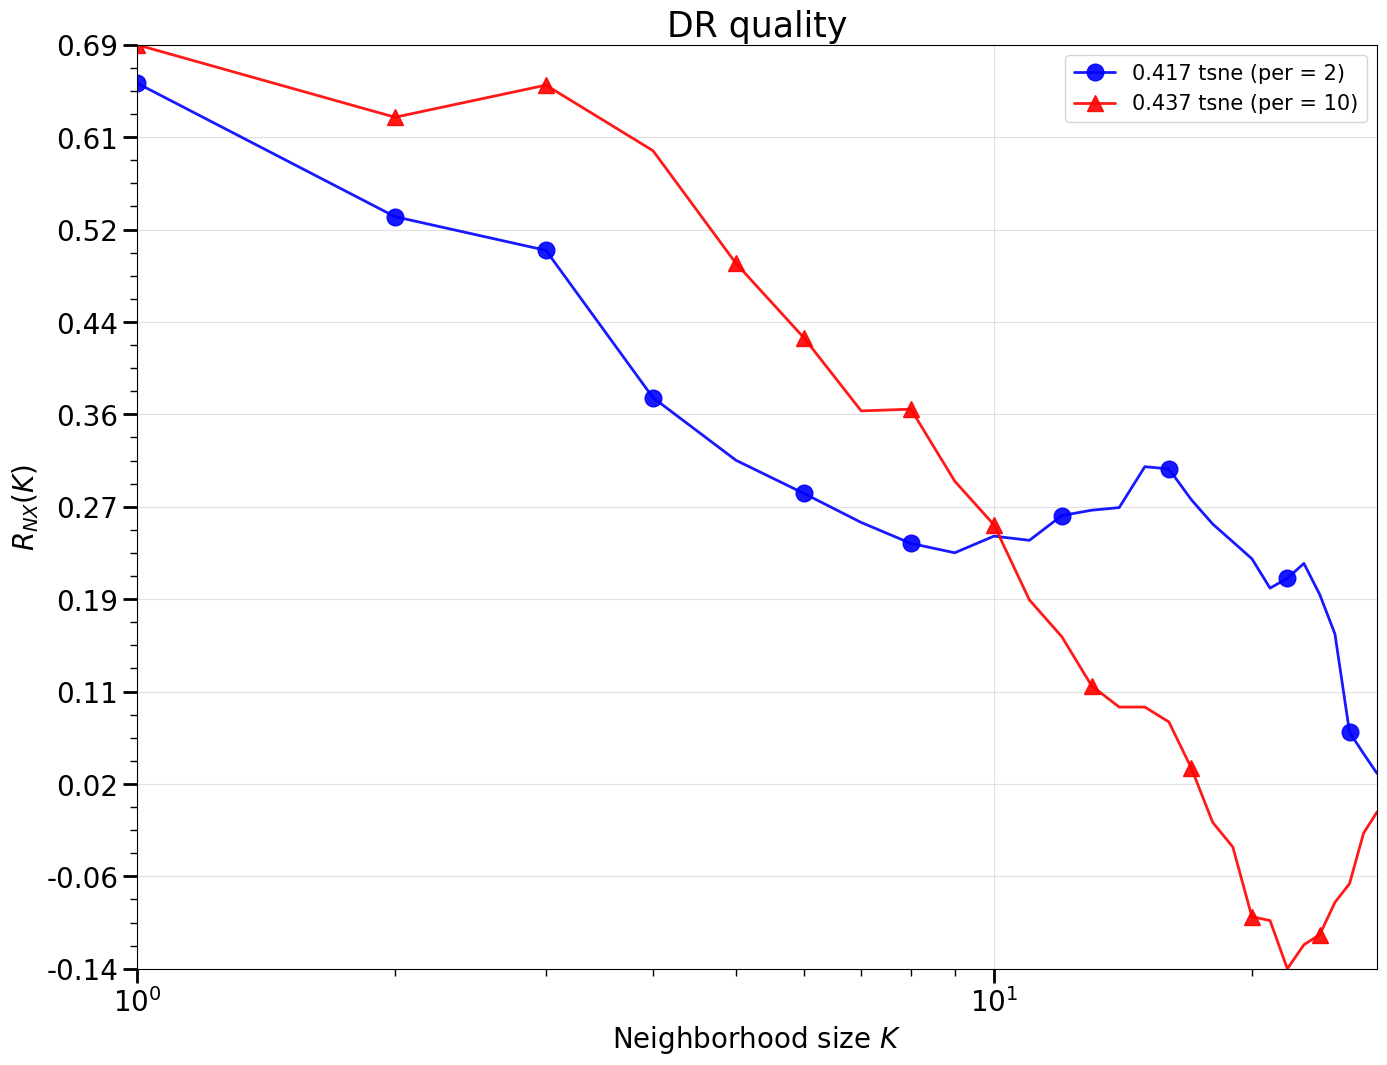

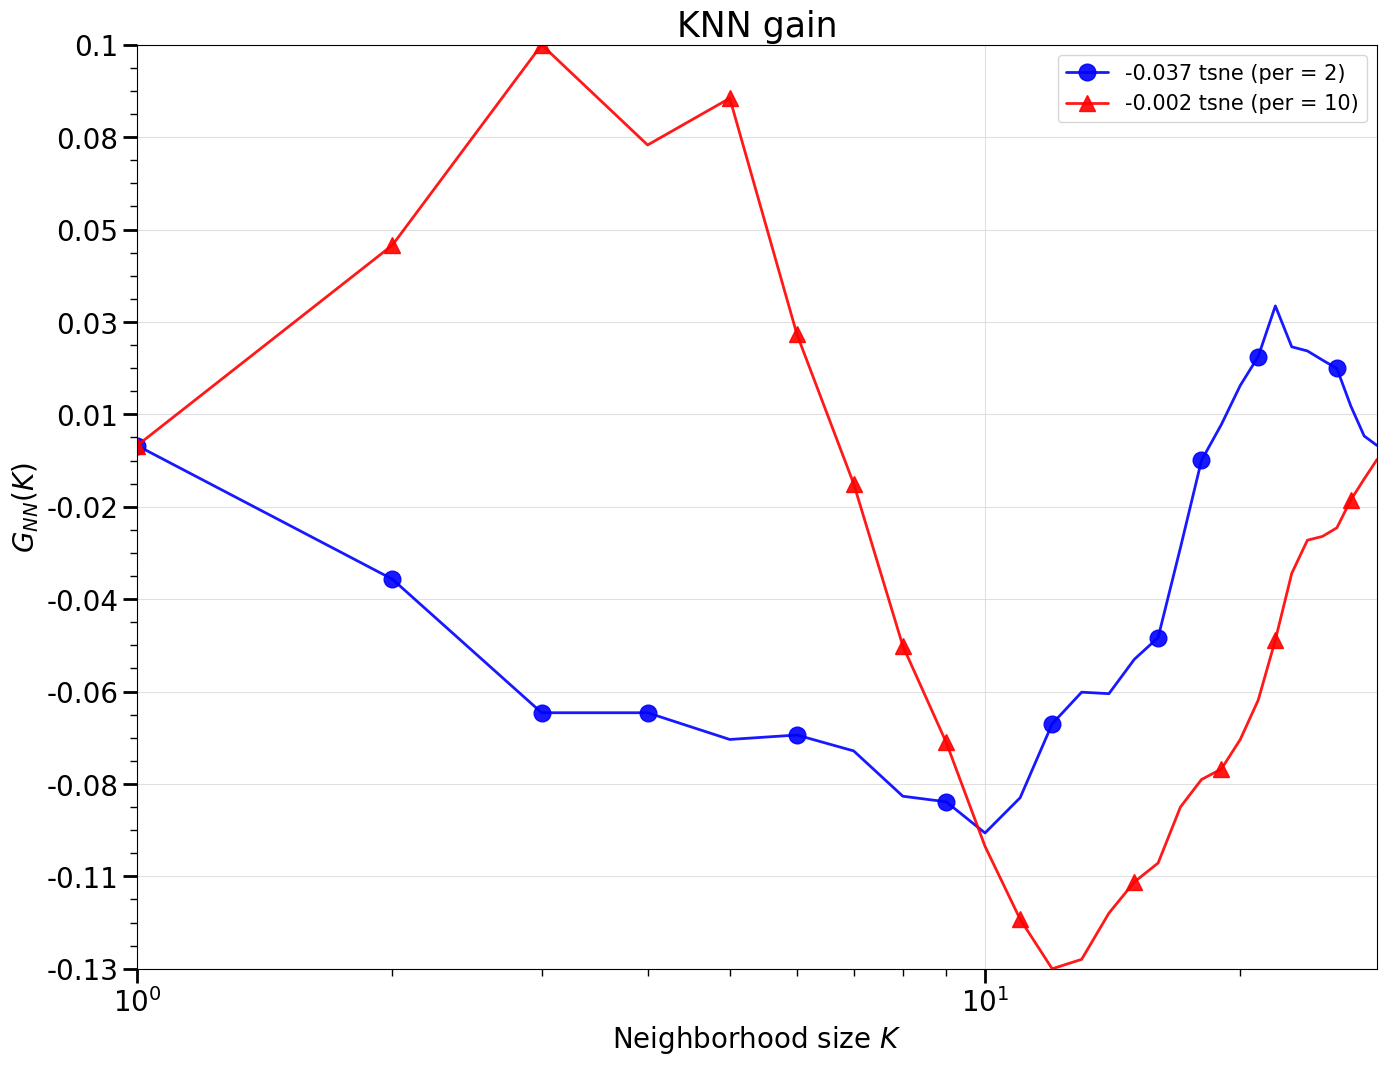

In [19]:
local_metrics = LocalMetric()
for i in range(3):
    if i != 1 and i != 3:
        local_metrics.calculate_knn_gain_and_dr_quality(
                X_lds=reduced_his[i],
                X_hds=x,
                labels=np.array(y),
                method_name=f"tsne (per = {perplexity_list[i]})")
        print(np.array(y))
local_metrics.visualize()

FileNotFoundError: [Errno 2] No such file or directory: 'plots/tsne_perplexity.png'

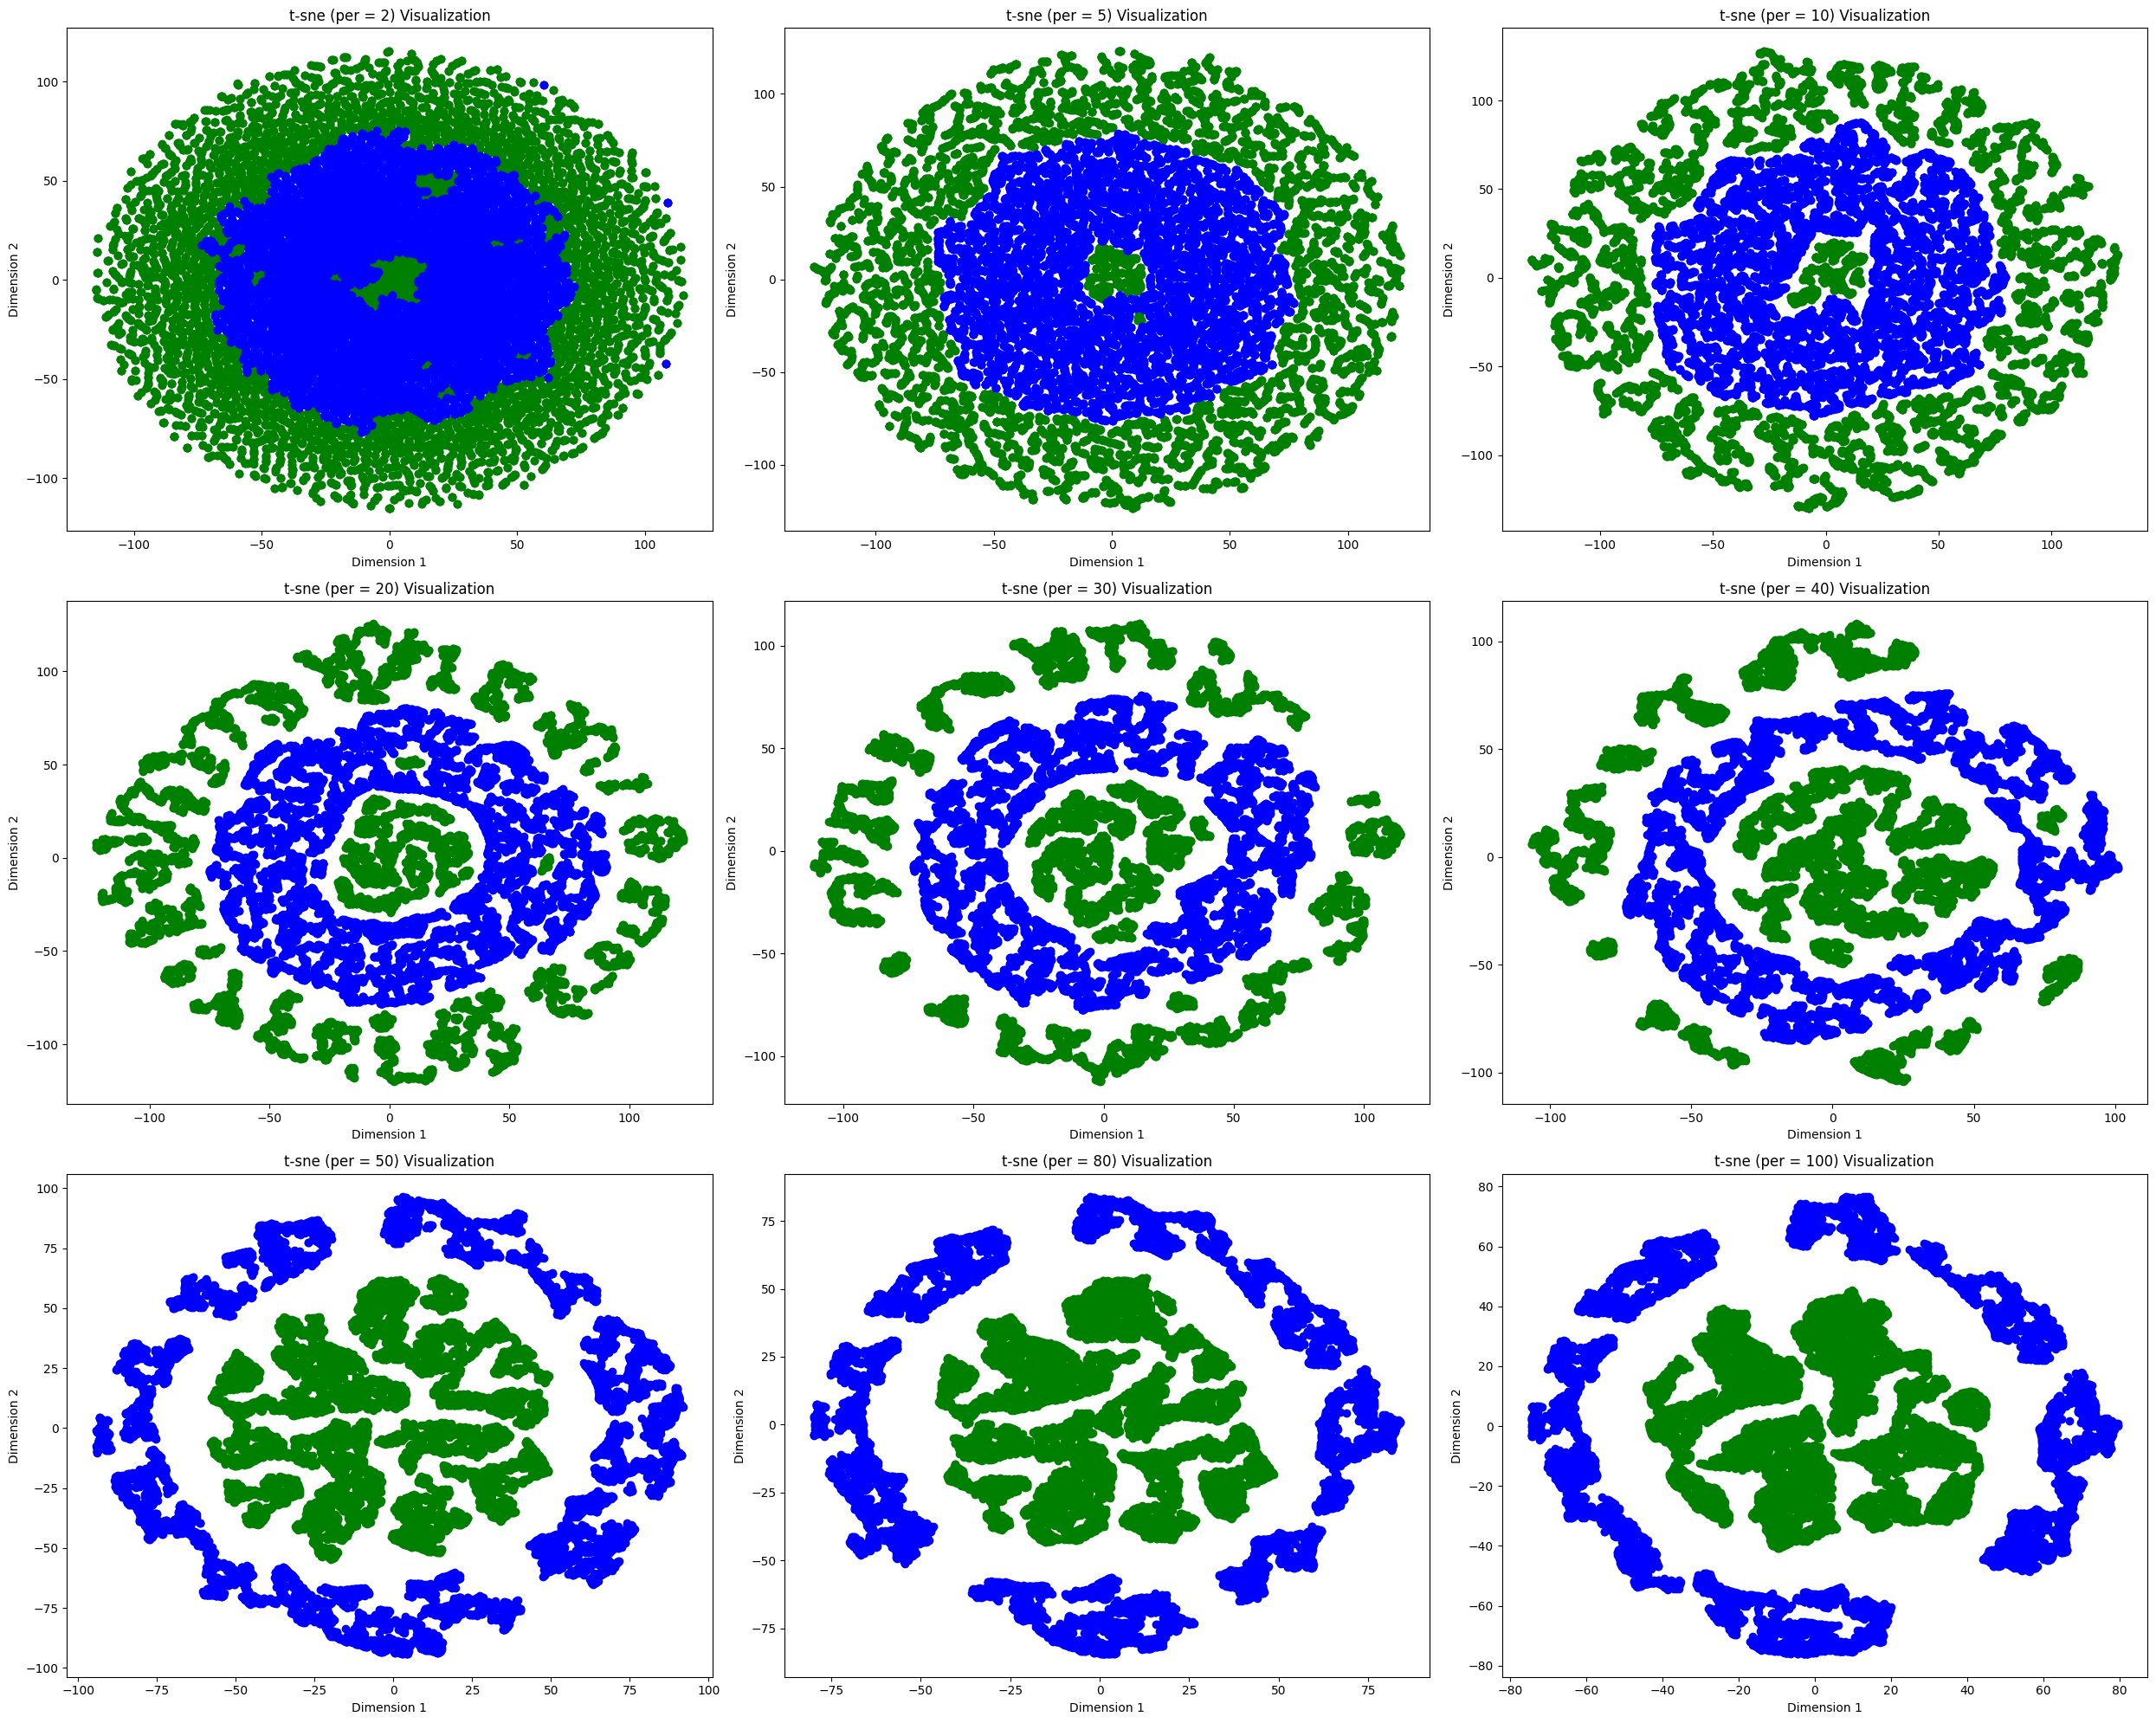

In [ ]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]  # Wybór odpowiedniej osi
        plt.sca(ax)  # Ustawienie bieżącej osi
        embeded_visualization_two_clases(reduced_his[counter], 10000, f"t-sne (per = {perplexity_list[counter]})")
        counter += 1

plt.tight_layout()
plt.savefig('plots/tsne_perplexity.png')
plt.show()

UMAP

In [ ]:
n_neighbours_list = [2, 5, 10, 20, 30, 40, 50, 80, 100] # 15 -> standard in UMAP
# to local metrix
x = data
array_zer = np.zeros(10000)
array_jed = np.ones(10000)
y = np.concatenate((array_zer, array_jed))

reduced_his = []
for p in n_neighbours_list:
    # for m in min_dist_list:
    umap = UMAP(n_components=2, n_neighbors=p)
    reduced = umap.fit_transform(data)
    reduced_his.append(reduced)

In [ ]:
local_metrics2 = LocalMetric()
for i in range(9):
    if i != 1 and i != 3:
        local_metrics2.calculate_knn_gain_and_dr_quality(
                X_lds=reduced_his[i],
                X_hds=x,
                labels=np.array(y),
                method_name=f"Umap (n = {n_neighbours_list[i]})")
local_metrics2.visualize()

In [ ]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]  # Wybór odpowiedniej osi
        plt.sca(ax)  # Ustawienie bieżącej osi
        embeded_visualization_two_clases(reduced_his[counter], 10000, f"Umap (n = {n_neighbours_list[counter]})")
        counter += 1

plt.tight_layout()
plt.savefig('plots/umap_perplexity.png')
plt.show()

TriMAP

In [ ]:
n_neighbours_list = [2, 5, 10, 20, 30, 40, 50, 80, 100] # 12 -> standard in Trimap
# to local metrix
x = data
array_zer = np.zeros(10000)
array_jed = np.ones(10000)
y = np.concatenate((array_zer, array_jed))

reduced_his = []
for p in n_neighbours_list:
    trimap = TRIMAP(n_dims=2, n_inliers=p)
    reduced = trimap.fit_transform(data)
    reduced_his.append(reduced)

In [ ]:
local_metrics3 = LocalMetric()
for i in range(9):
    if i != 1 and i != 3:
        local_metrics3.calculate_knn_gain_and_dr_quality(
                X_lds=reduced_his[i],
                X_hds=x,
                labels=np.array(y),
                method_name=f"Trimap (n = {n_neighbours_list[i]})")
local_metrics3.visualize()

In [ ]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]  # Wybór odpowiedniej osi
        plt.sca(ax)  # Ustawienie bieżącej osi
        embeded_visualization_two_clases(reduced_his[counter], 10000, f"Trimap (n = {n_neighbours_list[counter]})")
        counter += 1

plt.tight_layout()
plt.savefig('plots/trimap_perplexity.png')
plt.show()

PacMAP

In [ ]:
n_neighbours_list = [2, 5, 10, 20, 30, 40, 50, 80, 100] # 10 -> standard in PacMAP
# to local metrix
x = data
array_zer = np.zeros(10000)
array_jed = np.ones(10000)
y = np.concatenate((array_zer, array_jed))
reduced_his = []

for p in n_neighbours_list:
    trimap = PaCMAP(n_components=2, n_neighbors=p)
    reduced = trimap.fit_transform(data)
    reduced_his.append(reduced)

In [ ]:
local_metrics4 = LocalMetric()
for i in range(9):
    if i != 1 and i != 3:
        local_metrics4.calculate_knn_gain_and_dr_quality(
                X_lds=reduced_his[i],
                X_hds=x,
                labels=np.array(y),
                method_name=f"Pacmap (n = {n_neighbours_list[i]})")
local_metrics4.visualize()

In [ ]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]  # Wybór odpowiedniej osi
        plt.sca(ax)  # Ustawienie bieżącej osi
        embeded_visualization_two_clases(reduced_his[counter], 10000, f"PacMAP (n = {n_neighbours_list[counter]})")
        counter += 1

plt.tight_layout()
plt.savefig('plots/pacmap_perplexity.png')
plt.show()

# Sphere and ball inside

In [ ]:
# sphere and torus inside
sphere_points = sphere_points_generator(3, 10000, 7)
ball_points = ball_points_generator(3, 10000, 2)
data = np.concatenate((sphere_points, ball_points))

t-SNE

In [ ]:
local_metrics = LocalMetric()
perplexity_list = [2, 5, 10, 20, 30, 40, 50, 80, 100]  # 30 -> standard in TSNE

# to local metric
x = data
array_zer = np.zeros(10000)
array_jed = np.ones(10000)
y = np.concatenate((array_zer, array_jed))

reduced_his = []  # Lista do przechowywania wykresów

for p in perplexity_list:
    tsne = TSNE(n_components=2, perplexity=p)
    reduced_tsne = tsne.fit_transform(data)
    reduced_his.append(reduced_tsne)

In [ ]:
local_metrics = LocalMetric()
for i in range(9):
    if i != 1 and i != 3:
        local_metrics.calculate_knn_gain_and_dr_quality(
            X_lds=reduced_his[i],
            X_hds=x,
            labels=np.array(y),
            method_name=f"tsne (per = {perplexity_list[i]})")
local_metrics.visualize()

In [ ]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]  # Wybór odpowiedniej osi
        plt.sca(ax)  # Ustawienie bieżącej osi
        embeded_visualization_two_clases(reduced_his[counter], 10000, f"t-sne (per = {perplexity_list[counter]})")
        counter += 1

plt.tight_layout()
plt.savefig('plots/tsne_perplexity_1_sphere_1_ball.png')
plt.show()

UMAP

In [ ]:
n_neighbours_list = [2, 5, 10, 20, 30, 40, 50, 80, 100] # 15 -> standard in UMAP
# to local metrix
x = data
array_zer = np.zeros(10000)
array_jed = np.ones(10000)
y = np.concatenate((array_zer, array_jed))

reduced_his = []
for p in n_neighbours_list:
    # for m in min_dist_list:
    umap = UMAP(n_components=2, n_neighbors=p)
    reduced = umap.fit_transform(data)
    reduced_his.append(reduced)

In [ ]:
local_metrics2 = LocalMetric()
for i in range(9):
    if i != 1 and i != 3:
        local_metrics2.calculate_knn_gain_and_dr_quality(
                X_lds=reduced_his[i],
                X_hds=x,
                labels=np.array(y),
                method_name=f"Umap (n = {n_neighbours_list[i]})")
local_metrics2.visualize()

In [ ]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]  # Wybór odpowiedniej osi
        plt.sca(ax)  # Ustawienie bieżącej osi
        embeded_visualization_two_clases(reduced_his[counter], 10000, f"Umap (n = {n_neighbours_list[counter]})")
        counter += 1

plt.tight_layout()
plt.savefig('plots/umap_perplexity_1_sphere_1_ball.png')
plt.show()

TriMAP

In [ ]:
n_neighbours_list = [2, 5, 10, 20, 30, 40, 50, 80, 100]  # 12 -> standard in Trimap
# to local metrix
x = data
array_zer = np.zeros(10000)
array_jed = np.ones(10000)
y = np.concatenate((array_zer, array_jed))

reduced_his = []
for p in n_neighbours_list:
    trimap = TRIMAP(n_dims=2, n_inliers=p)
    reduced = trimap.fit_transform(data)
    reduced_his.append(reduced)

In [ ]:
local_metrics3 = LocalMetric()
for i in range(9):
    if i != 1 and i != 3:
        local_metrics3.calculate_knn_gain_and_dr_quality(
            X_lds=reduced_his[i],
            X_hds=x,
            labels=np.array(y),
            method_name=f"Trimap (n = {n_neighbours_list[i]})")
local_metrics3.visualize()

In [ ]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]  # Wybór odpowiedniej osi
        plt.sca(ax)  # Ustawienie bieżącej osi
        embeded_visualization_two_clases(reduced_his[counter], 10000, f"Trimap (n = {n_neighbours_list[counter]})")
        counter += 1

plt.tight_layout()
plt.savefig('plots/trimap_perplexity_1_sphere_1_ball.png')
plt.show()

PacMAM


In [ ]:
n_neighbours_list = [2, 5, 10, 20, 30, 40, 50, 80, 100]  # 10 -> standard in PacMAP
# to local metrix
x = data
array_zer = np.zeros(10000)
array_jed = np.ones(10000)
y = np.concatenate((array_zer, array_jed))
reduced_his = []

for p in n_neighbours_list:
    trimap = PaCMAP(n_components=2, n_neighbors=p)
    reduced = trimap.fit_transform(data)
    reduced_his.append(reduced)

In [ ]:
local_metrics4 = LocalMetric()
for i in range(9):
    if i != 1 and i != 3:
        local_metrics4.calculate_knn_gain_and_dr_quality(
            X_lds=reduced_his[i],
            X_hds=x,
            labels=np.array(y),
            method_name=f"Pacmap (n = {n_neighbours_list[i]})")
local_metrics4.visualize()

# Two sphere and ball inside

In [ ]:
sphere_points = sphere_points_generator(3, 10000, 7)
sphere_points2 = sphere_points_generator(3, 10000, 10)
ball_points = ball_points_generator(3, 10000, 2)
data = np.concatenate((sphere_points, sphere_points2, ball_points))

t-SNE

In [ ]:
local_metrics = LocalMetric()
perplexity_list = [2, 5, 10, 20, 30, 40, 50, 80, 100]  # 30 -> standard in TSNE

# to local metric
x = data
array_zer = np.zeros(10000)
array_jed = np.ones(10000)
array_dwa = np.full(10000, 2)
y = np.concatenate((array_zer, array_jed, array_dwa))

reduced_his = []  # Lista do przechowywania wykresów

for p in perplexity_list:
    tsne = TSNE(n_components=2, perplexity=p)
    reduced_tsne = tsne.fit_transform(data)
    reduced_his.append(reduced_tsne)

In [ ]:
local_metrics = LocalMetric()
for i in range(9):
    if i != 1 and i != 3:
        local_metrics.calculate_knn_gain_and_dr_quality(
            X_lds=reduced_his[i],
            X_hds=x,
            labels=np.array(y),
            method_name=f"tsne (per = {perplexity_list[i]})")
local_metrics.visualize()

In [ ]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]  # Wybór odpowiedniej osi
        plt.sca(ax)  # Ustawienie bieżącej osi
        embeded_visualization_three_clases(reduced_his[counter], 10000, f"t-sne (per = {perplexity_list[counter]})")
        counter += 1

plt.tight_layout()
plt.savefig('plots/tsne_perplexity_2_sphere_1_ball.png')
plt.show()

UMAP

In [ ]:
n_neighbours_list = [2, 5, 10, 20, 30, 40, 50, 80, 100]  # 15 -> standard in UMAP
# to local metrix
x = data
array_zer = np.zeros(10000)
array_jed = np.ones(10000)
array_dwa = np.full(10000, 2)
y = np.concatenate((array_zer, array_jed, array_dwa))

reduced_his = []
for p in n_neighbours_list:
    # for m in min_dist_list:
    umap = UMAP(n_components=2, n_neighbors=p)
    reduced = umap.fit_transform(data)
    reduced_his.append(reduced)
local_metrics2 = LocalMetric()
for i in range(9):
    if i != 1 and i != 3:
        local_metrics2.calculate_knn_gain_and_dr_quality(
            X_lds=reduced_his[i],
            X_hds=x,
            labels=np.array(y),
            method_name=f"Umap (n = {n_neighbours_list[i]})")
local_metrics2.visualize()

In [ ]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]  # Wybór odpowiedniej osi
        plt.sca(ax)  # Ustawienie bieżącej osi
        embeded_visualization_three_clases(reduced_his[counter], 10000, f"Umap (n = {n_neighbours_list[counter]})")
        counter += 1

plt.tight_layout()
plt.savefig('plots/umap_perplexity_2_sphere_1_ball.png')
plt.show()

Trimap

In [ ]:
n_neighbours_list = [2, 5, 10, 20, 30, 40, 50, 80, 100]  # 12 -> standard in Trimap
# to local metrix
x = data
array_zer = np.zeros(10000)
array_jed = np.ones(10000)
array_dwa = np.full(10000, 2)
y = np.concatenate((array_zer, array_jed, array_dwa))

reduced_his = []
for p in n_neighbours_list:
    trimap = TRIMAP(n_dims=2, n_inliers=p)
    reduced = trimap.fit_transform(data)
    reduced_his.append(reduced)
local_metrics3 = LocalMetric()
for i in range(9):
    if i != 1 and i != 3:
        local_metrics3.calculate_knn_gain_and_dr_quality(
            X_lds=reduced_his[i],
            X_hds=x,
            labels=np.array(y),
            method_name=f"Trimap (n = {n_neighbours_list[i]})")
local_metrics3.visualize()
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]  # Wybór odpowiedniej osi
        plt.sca(ax)  # Ustawienie bieżącej osi
        embeded_visualization_three_clases(reduced_his[counter], 10000, f"Trimap (n = {n_neighbours_list[counter]})")
        counter += 1

plt.tight_layout()
plt.savefig('plots/trimap_perplexity_2_sphere_1_ball.png')
plt.show()

PACMAP

In [ ]:
n_neighbours_list = [2, 5, 10, 20, 30, 40, 50, 80, 100]  # 10 -> standard in PacMAP
# to local metrix
x = data
array_zer = np.zeros(10000)
array_jed = np.ones(10000)
array_dwa = np.full(10000, 2)
y = np.concatenate((array_zer, array_jed, array_dwa))
reduced_his = []

for p in n_neighbours_list:
    trimap = PaCMAP(n_components=2, n_neighbors=p)
    reduced = trimap.fit_transform(data)
    reduced_his.append(reduced)
local_metrics4 = LocalMetric()
for i in range(9):
    if i != 1 and i != 3:
        local_metrics4.calculate_knn_gain_and_dr_quality(
            X_lds=reduced_his[i],
            X_hds=x,
            labels=np.array(y),
            method_name=f"Pacmap (n = {n_neighbours_list[i]})")
local_metrics4.visualize()

num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 20))

counter = 0
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]  # Wybór odpowiedniej osi
        plt.sca(ax)  # Ustawienie bieżącej osi
        embeded_visualization_three_clases(reduced_his[counter], 10000, f"PacMAP (n = {n_neighbours_list[counter]})")
        counter += 1

plt.tight_layout()
plt.savefig('plots/pacmap_perplexity_2_sphere_1_ball.png')
plt.show()